In [1]:
"""
@description: 执行训练
"""


"""
工程所在绝对路径
"""
from os.path import dirname, abspath, realpath, curdir
PROJECT_ROOT = realpath(curdir)
import sys
sys.path.append(PROJECT_ROOT)

"""
import
"""
from _config import *  # 导入配置
import utils
from os.path import join as pjoin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch.nn.functional as F
import torch



In [2]:
device = torch.device(6)

In [3]:
DATA_LIST_ROOT = pjoin(PROJECT_ROOT, 'data_list')

# 网络
net = utils.create_net(3, NUM_CLASSES, net_name='unet_resnet50')
net.to(device)
# loss
''' todo '''

# 训练数据生成器
df_train = pd.read_csv(pjoin(DATA_LIST_ROOT, 'train.csv'))
data_generator = utils.train_data_generator(np.array(df_train['image']),
                                            np.array(df_train['label']),
                                            BATCH_SIZE, IMAGE_SIZE, HEIGHT_CROP_OFFSET)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0)

In [106]:
len(df_train['image'])

21914

In [74]:
images, labels = next(data_generator)
images = images.to(device)
labels = labels.to(device)
print(images.shape, labels.shape)

out = net(images)
print(out.shape)

optimizer.zero_grad()

loss, mean_iou = utils.create_loss(out, labels, NUM_CLASSES)
print(loss, mean_iou)

loss.backward()
optimizer.step()

torch.Size([8, 3, 256, 768]) torch.Size([8, 256, 768])
torch.Size([8, 8, 256, 768])
tensor(0.3377, device='cuda:6', grad_fn=<AddBackward0>) tensor(0.)


In [110]:
loss.item(), mean_iou.item()

(0.33768635988235474, 0.0)

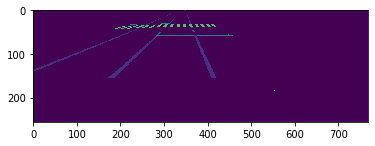

In [77]:
plt.imshow(labels.cpu().numpy()[0])

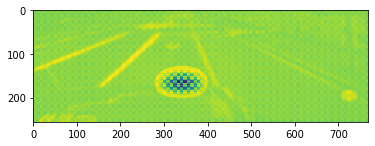

In [93]:
plt.imshow(out.cpu().detach().numpy()[0][6])

In [101]:

out.cpu().detach().numpy()[0][0]

array([[1.1546551, 1.4038087, 1.618268 , ..., 1.5138758, 1.585804 ,
        1.0550113],
       [1.6012264, 2.0758548, 2.2492416, ..., 2.2119899, 2.188643 ,
        1.5057982],
       [1.4364431, 1.9899219, 2.0010138, ..., 2.1199338, 1.963737 ,
        1.405284 ],
       ...,
       [1.6823262, 2.1964319, 2.33627  , ..., 2.3329463, 2.2884707,
        1.5790861],
       [1.3958067, 1.9349731, 1.9625759, ..., 2.073924 , 1.9040943,
        1.3443456],
       [1.4018   , 1.6470966, 1.8874178, ..., 1.7069232, 1.8385371,
        1.2292016]], dtype=float32)

In [104]:

out.cpu().detach().numpy()[0][3]

array([[-0.85573137, -1.1099463 , -1.2397761 , ..., -1.1890583 ,
        -1.2223911 , -0.9710752 ],
       [-1.1199006 , -1.7349046 , -1.6009389 , ..., -1.8289964 ,
        -1.5741577 , -1.3557308 ],
       [-1.093011  , -1.4639999 , -1.6307386 , ..., -1.5527608 ,
        -1.5974185 , -1.1637287 ],
       ...,
       [-1.1584018 , -1.8680193 , -1.6452495 , ..., -1.9569421 ,
        -1.6243821 , -1.4335371 ],
       [-1.0833676 , -1.4182092 , -1.5961967 , ..., -1.5173014 ,
        -1.5596467 , -1.1458067 ],
       [-0.8359946 , -1.3634762 , -1.122158  , ..., -1.4260952 ,
        -1.0849468 , -1.0919701 ]], dtype=float32)

In [98]:
np.sum(np.argmax(out.cpu().detach().numpy(), axis=1))

0

In [59]:
# sys.path.append('/home/howard/Nutstore Files/我的坚果云/code_tools')

In [60]:
# from pyhw import hwimage

(1, 8, 384, 1024)


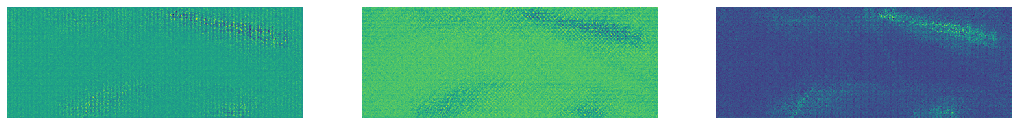

In [61]:
img = out.detach().numpy()
print(img.shape)
# plt.imshow(img[0][1])
imgs = []
for i in range(0, 3):
    imgs.append(img[0][i])
hwimage.imshow_multi(imgs)

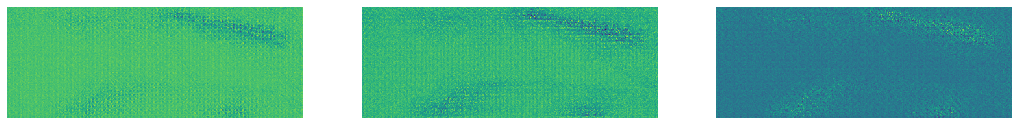

In [62]:
imgs = []
for i in range(3, 6):
    imgs.append(img[0][i])
hwimage.imshow_multi(imgs)

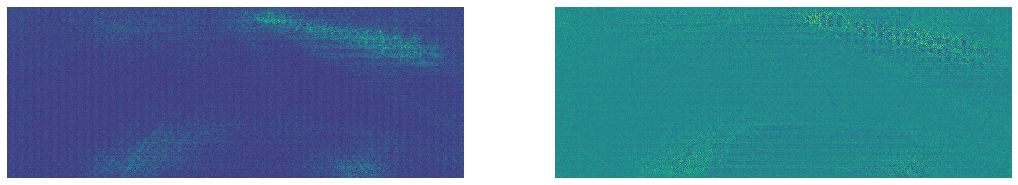

In [63]:
imgs = []
for i in range(6, 8):
    imgs.append(img[0][i])
hwimage.imshow_multi(imgs)